In [1]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from toy_example_new import *

In [3]:
#set-up parameters
random_state = np.random.RandomState(seed=42)

T = 25
Lambda = 1
a = 1
b = 1
Y = Computation_Y_Exp(T, Lambda, a, b, random_state=random_state)

ended burn-in @ 402399: -0.016


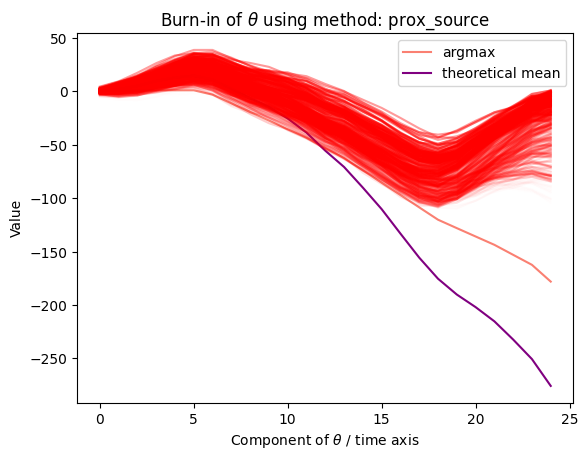

In [16]:
sim_prox_source, accepts_prox_source, gammas_prox_source, end_prox_source, fig_prox_source = MetropolisHastings(T, Lambda, Y, a, b, method="prox_source", random_state=random_state, niter=2e6)
# save
np.savez("stuff/toymodel2MILprox_source.npz",
         theta_tab = sim_prox_source,
         accepts   = accepts_prox_source,
         gammas    = gammas_prox_source,
         end_burnin= end_prox_source
        )

ended burn-in @ 402399: -0.014


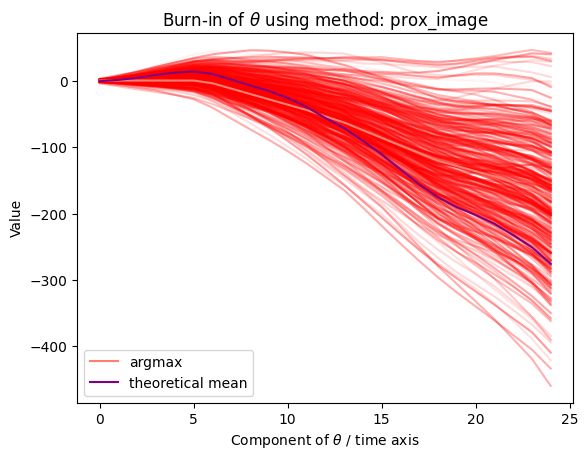

In [81]:
sim_prox_image, accepts_prox_image, gammas_prox_image, end_prox_image, fig_prox_image = MetropolisHastings(T, Lambda, Y, a, b, method="prox_image", random_state=random_state, niter=2e6)
# save
np.savez("stuff/toymodel2MILprox_image.npz",
         theta_tab = sim_prox_image,
         accepts   = accepts_prox_image,
         gammas    = gammas_prox_image,
         end_burnin= end_prox_image
        )

ended burn-in @ 402399: 0.013


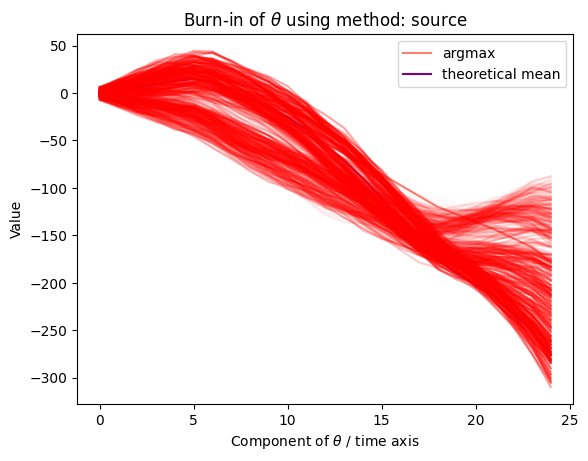

In [38]:
sim_source, accepts_source, gammas_source, end_source, fig_source = MetropolisHastings(T, Lambda, Y, a, b, method="source", random_state=random_state, niter=2e6)
# save
np.savez("stuff/toymodel2MILrw_source.npz",
         theta_tab = sim_source,
         accepts   = accepts_source,
         gammas    = gammas_source,
         end_burnin= end_source
        )

ended burn-in @ 402399: -0.010


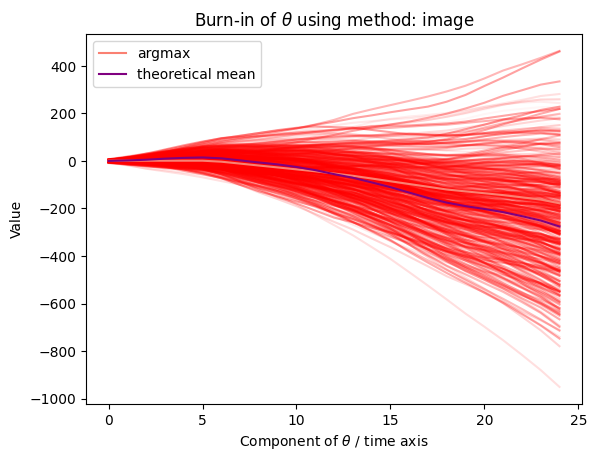

In [97]:
sim_image, accepts_image, gammas_image, end_image, fig_image = MetropolisHastings(T, Lambda, Y, a, b, method="image", random_state=random_state, niter=2e6)
# save
np.savez("stuff/toymodel2MILrw_image.npz",
         theta_tab = sim_image,
         accepts   = accepts_image,
         gammas    = gammas_image,
         end_burnin= end_image
        )

ended burn-in @ 402399: -0.007


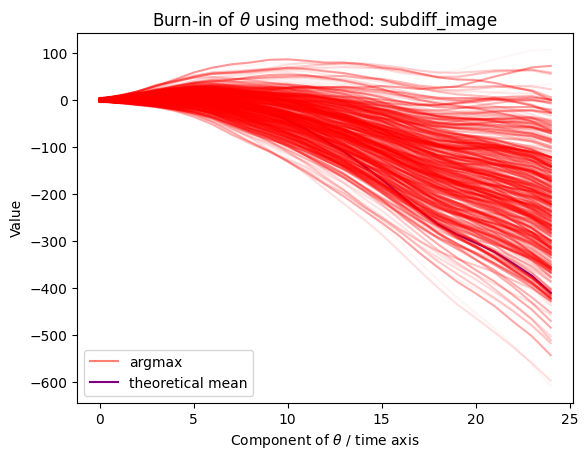

In [42]:
sim_subdiff_image, accepts_subdiff_image, gammas_subdiff_image, end_subdiff_image, fig_subdiff_image = MetropolisHastings(T, 0, Y, a, b, method="subdiff_image", random_state=random_state, niter=2e6)
# save
np.savez("stuff/toymodel2MILsubdiff_image.npz",
         theta_tab = sim_subdiff_image,
         accepts   = accepts_subdiff_image,
         gammas    = gammas_subdiff_image,
         end_burnin= end_subdiff_image
        )

ended burn-in @ 402399: 0.047


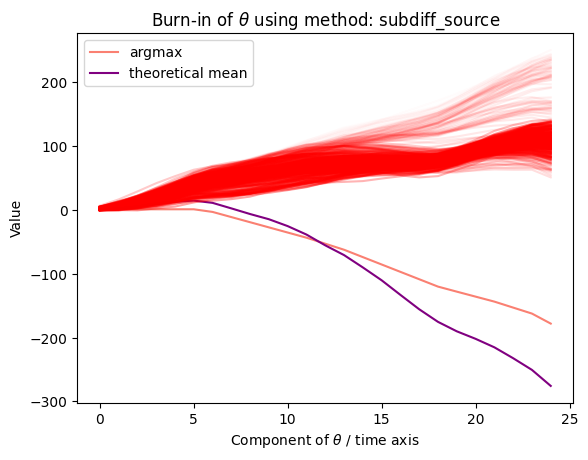

In [43]:
sim_subdiff_source, accepts_subdiff_source, gammas_subdiff_source, end_subdiff_source, fig_subdiff_source = MetropolisHastings(T, Lambda, Y, a, b, method="subdiff_source", random_state=random_state, niter=2e6)
# save
np.savez("stuff/toymodel2MILsubdiff_source.npz",
         theta_tab = sim_subdiff_source,
         accepts   = accepts_subdiff_source,
         gammas    = gammas_subdiff_source,
         end_burnin= end_subdiff_source
        )

In [98]:
#loading results
data_proxsource= np.load("stuff/toymodel2MILprox_source.npz")
theta_tab_proxsource = data_proxsource["theta_tab"]
accepts_proxsource   = data_proxsource["accepts"]
gammas_proxsource    = data_proxsource["gammas"]
end_burnin_proxsource=data_proxsource["end_burnin"]

In [99]:
data_proximage= np.load("stuff/toymodel2MILprox_image.npz")
theta_tab_proximage = data_proximage["theta_tab"]
accepts_proximage   = data_proximage["accepts"]
gammas_proximage    = data_proximage["gammas"]
end_burnin_proximage=data_proximage["end_burnin"]

In [100]:
data_rwsource= np.load("stuff/toymodel2MILrw_source.npz")
theta_tab_rwsource = data_rwsource["theta_tab"]
accepts_rwsource   = data_rwsource["accepts"]
gammas_rwsource    = data_rwsource["gammas"]
end_burnin_rwsource=data_rwsource["end_burnin"]

In [101]:
data_rwimage= np.load("stuff/toymodel2MILrw_image.npz")
theta_tab_rwimage = data_rwimage["theta_tab"]
accepts_rwimage   = data_rwimage["accepts"]
gammas_rwimage    = data_rwimage["gammas"]
end_burnin_rwimage=data_rwimage["end_burnin"]

In [102]:
data_subdiffsource= np.load("stuff/toymodel2MILsubdiff_source.npz")
theta_tab_subdiffsource = data_subdiffsource["theta_tab"]
accepts_subdiffsource   = data_subdiffsource["accepts"]
gammas_subdiffsource    = data_subdiffsource["gammas"]
end_burnin_subdiffsource=data_subdiffsource["end_burnin"]

In [103]:
data_subdiffimage= np.load("stuff/toymodel2MILsubdiff_image.npz")
theta_tab_subdiffimage = data_subdiffimage["theta_tab"]
accepts_subdiffimage   = data_subdiffimage["accepts"]
gammas_subdiffimage    = data_subdiffimage["gammas"]
end_burnin_subdiffimage=data_subdiffimage["end_burnin"]

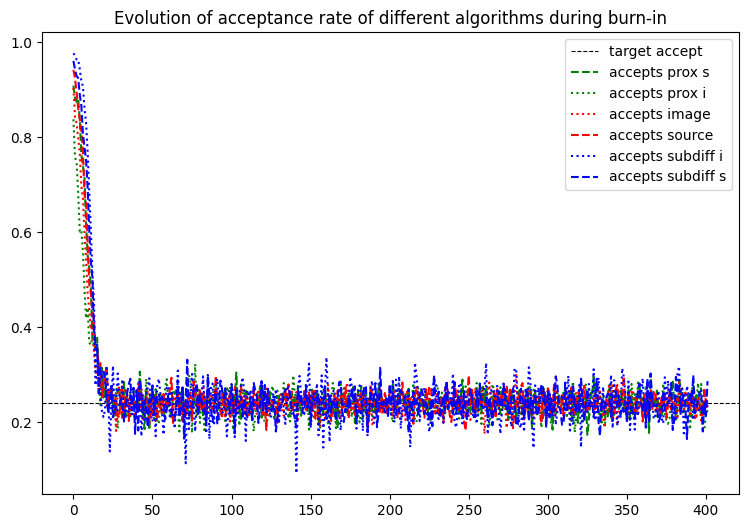

In [104]:
#acceptance rate
fig,ax = plt.subplots(1,1, figsize=(9,6))
ax.set_title("Evolution of acceptance rate of different algorithms during burn-in")
ax.axhline(0.24, label="target accept", color="black", linestyle="dashed", linewidth=0.8)
ax.plot(accepts_proxsource, label="accepts prox s", color="green", linestyle="dashed")
ax.plot(accepts_proximage, label="accepts prox i", color="green", linestyle="dotted")
ax.plot(accepts_rwimage, label= "accepts image", color="red", linestyle="dotted")
ax.plot(accepts_rwsource, label="accepts source", color="red", linestyle="dashed")
ax.plot(accepts_subdiffimage, label="accepts subdiff i", color="blue", linestyle="dotted")
ax.plot(accepts_subdiffsource, label="accepts subdiff s", color="blue", linestyle="dashed")
ax.legend()

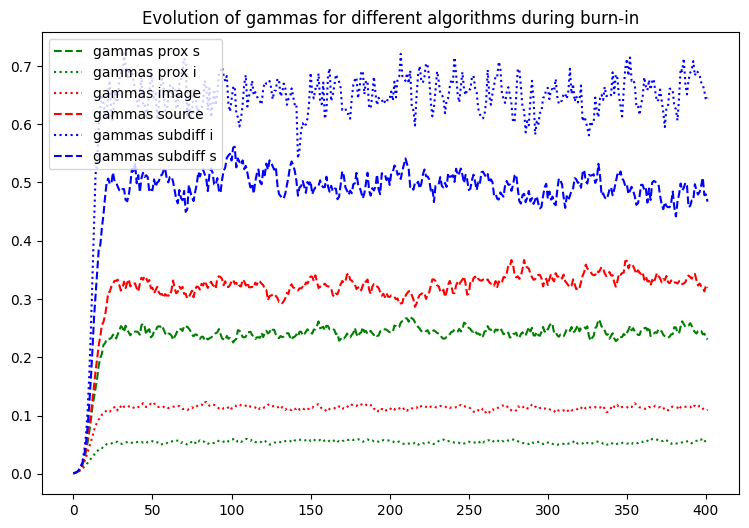

In [105]:
#evolution of gammas
fig,ax = plt.subplots(1,1, figsize=(9,6))
ax.set_title("Evolution of gammas for different algorithms during burn-in")
# ax.axhline(0.24, label="target accept", color="black", linestyle="dashed", linewidth=0.8)
ax.plot(gammas_proxsource, label="gammas prox s", color="green", linestyle="dashed")
ax.plot(gammas_proximage, label="gammas prox i", color="green", linestyle="dotted")
ax.plot(gammas_rwimage, label= "gammas image", color="red", linestyle="dotted")
ax.plot(gammas_rwsource, label="gammas source", color="red", linestyle="dashed")
ax.plot(gammas_subdiffimage, label="gammas subdiff i", color="blue", linestyle="dotted")
ax.plot(gammas_subdiffsource, label="gammas subdiff s", color="blue", linestyle="dashed")
ax.legend()

In [106]:
#theta mean obtained from simulation

mu, _ = ComputeMeans(T, Lambda, Y, a, b)
x,  _  = ComputeArgmax(T, Lambda, Y, a, b)

mean_proxsource = theta_tab_proxsource[end_burnin_proxsource:].mean(axis=0)
mean_proximage = theta_tab_proximage[end_burnin_proximage:].mean(axis=0)
mean_rwsource = theta_tab_rwsource[end_burnin_rwsource:].mean(axis=0)
mean_rwimage = theta_tab_rwimage[end_burnin_rwimage:].mean(axis=0)
mean_subdiffsource = theta_tab_subdiffsource[end_burnin_subdiffsource:].mean(axis=0)
mean_subdiffimage = theta_tab_subdiffimage[end_burnin_subdiffimage:].mean(axis=0)

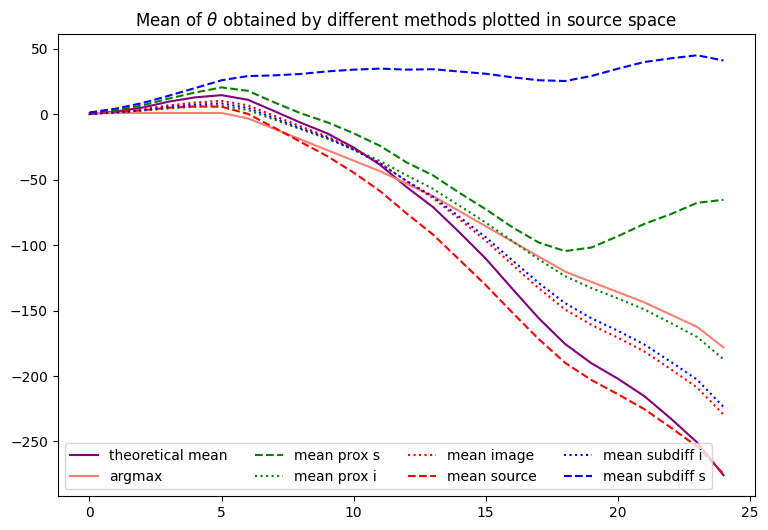

In [107]:
fig,ax = plt.subplots(1,1, figsize=(9,6))

ax.set_title(r"Mean of $\theta$ obtained by different methods plotted in source space")
ax.plot(mu, label="theoretical mean", color="purple", linestyle="solid")
ax.plot(x, label="argmax", color="salmon", linestyle="solid")
ax.plot(mean_proxsource, label="mean prox s", color="green", linestyle="dashed")
ax.plot(mean_proximage, label="mean prox i", color="green", linestyle="dotted")
ax.plot(mean_rwimage, label= "mean image", color="red", linestyle="dotted")
ax.plot(mean_rwsource, label="mean source", color="red", linestyle="dashed")
ax.plot(mean_subdiffimage, label="mean subdiff i", color="blue", linestyle="dotted")
ax.plot(mean_subdiffsource, label="mean subdiff s", color="blue", linestyle="dashed")
ax.legend(ncols=4)

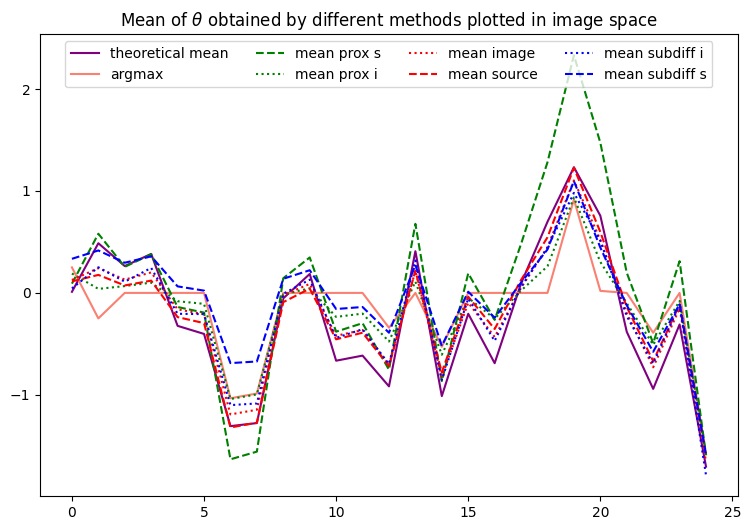

In [108]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
_, mu_tilde = ComputeMeans(T, Lambda, Y, a, b)
_, x_tilde  = ComputeArgmax(T, Lambda, Y, a, b)
D = BuildD(T)

ax.set_title(r"Mean of $\theta$ obtained by different methods plotted in image space")
ax.plot(mu_tilde, label="theoretical mean", color="purple", linestyle="solid")
ax.plot(x_tilde, label="argmax", color="salmon", linestyle="solid")
ax.plot(D @ mean_proxsource, label="mean prox s", color="green", linestyle="dashed")
ax.plot(D @ mean_proximage, label="mean prox i", color="green", linestyle="dotted")
ax.plot(D @ mean_rwimage, label= "mean image", color="red", linestyle="dotted")
ax.plot(D @ mean_rwsource, label="mean source", color="red", linestyle="dashed")
ax.plot(D @ mean_subdiffimage, label="mean subdiff i", color="blue", linestyle="dotted")
ax.plot(D @ mean_subdiffsource, label="mean subdiff s", color="blue", linestyle="dashed")
ax.legend(ncols=4, loc="upper center")

In [ ]:
# takes some time to compute
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T,a,b)
x, _ = ComputeArgmax(T, Lambda, Y, a, b)
logpi_max = LogDistributionPi(x, Y, A, D, sh, Lambda)

In [ ]:
logpi_proxsource    = LogDistributionPi_Tab(theta_tab_proxsource, Y, A, D, sh, Lambda)

In [ ]:
logpi_proximage     = LogDistributionPi_Tab(theta_tab_proximage, Y, A, D, sh, Lambda)

In [ ]:
logpi_rwimage       = LogDistributionPi_Tab(theta_tab_rwimage, Y, A, D, sh, Lambda)

In [ ]:
logpi_rwsource      = LogDistributionPi_Tab(theta_tab_rwsource, Y, A, D, sh, Lambda)

In [ ]:
logpi_subdiffimage  = LogDistributionPi_Tab(theta_tab_subdiffimage, Y, A, D, sh, Lambda)

In [ ]:
logpi_subdiffsource = LogDistributionPi_Tab(theta_tab_subdiffsource, Y, A, D, sh, Lambda)

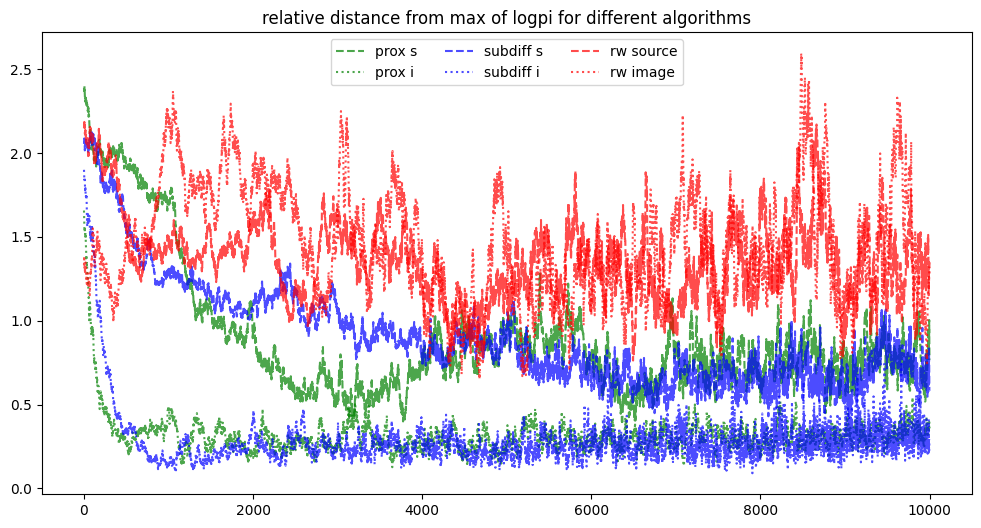

In [110]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("relative distance from max of logpi for different algorithms")
ax.plot(np.abs((logpi_proxsource[:10000] - logpi_max)/logpi_max), color = "green", label = "prox s", linestyle="dashed", alpha=0.7)
ax.plot(np.abs((logpi_proximage[:10000] - logpi_max)/logpi_max),  color = "green", label = "prox i", linestyle="dotted", alpha=0.7)
ax.plot(np.abs((logpi_subdiffsource[:10000] - logpi_max)/logpi_max),  color = "blue", label = "subdiff s", linestyle="dashed", alpha=0.7)
ax.plot(np.abs((logpi_subdiffimage[:10000] - logpi_max)/logpi_max), color = "blue", label = "subdiff i", linestyle="dotted", alpha=0.7)
ax.plot(np.abs((logpi_rwsource[:10000] - logpi_max)/logpi_max), color = "red", label = "rw source", linestyle="dashed", alpha=0.7)
ax.plot(np.abs((logpi_rwimage[:10000] - logpi_max)/logpi_max), color = "red", label = "rw image", linestyle="dotted", alpha=0.7)
ax.legend(ncols=3, loc="upper center")

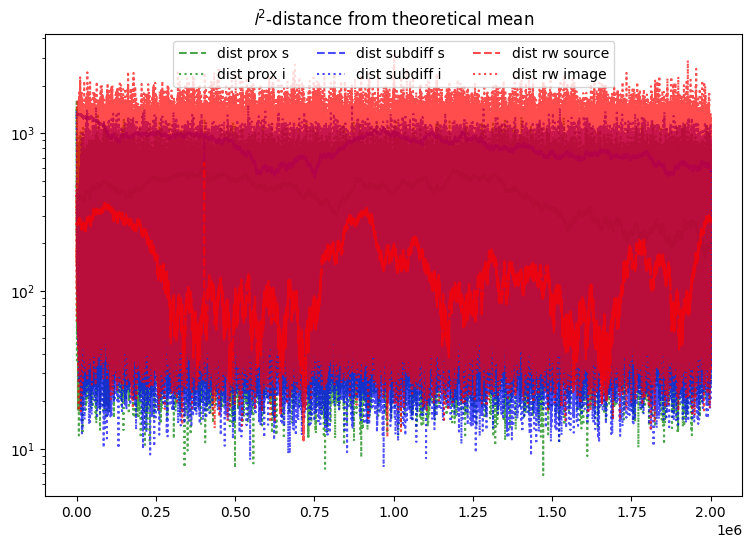

In [111]:
#i have no idea what is going on here

fig,ax = plt.subplots(1,1,figsize=(9,6))
mu, _ = ComputeMeans(T, Lambda, Y, a, b)

ax.set_title(r"$\mathcal{l}^2$-distance from theoretical mean")
ax.semilogy(npl.norm(theta_tab_proxsource-mu, axis=1), color = "green", label = "dist prox s", linestyle="dashed", alpha=0.7)
ax.semilogy(npl.norm(theta_tab_proximage-mu, axis=1), color = "green", label = "dist prox i", linestyle="dotted", alpha=0.7)
ax.semilogy(npl.norm(theta_tab_subdiffsource-mu, axis=1), color = "blue", label = "dist subdiff s", linestyle="dashed", alpha=0.7)
ax.semilogy(npl.norm(theta_tab_subdiffimage-mu, axis=1), color = "blue", label = "dist subdiff i", linestyle="dotted", alpha=0.7)
ax.semilogy(npl.norm(theta_tab_rwsource-mu, axis=1), color = "red", label = "dist rw source", linestyle="dashed", alpha=0.7)
ax.semilogy(npl.norm(theta_tab_rwimage-mu, axis=1), color = "red", label = "dist rw image", linestyle="dotted", alpha=0.7)
ax.legend(ncols=3, loc="upper center")

In [ ]:
q = np.array([2.5,50,97.5])

In [ ]:
quantiles_emp1 = Quantiles((D@theta_tab_rwsource.T).T, q, T)

In [ ]:
quantiles_emp2 = Quantiles((D@theta_tab_rwimage.T).T, q, T)

In [ ]:
quantiles_emp3 = Quantiles((D@theta_tab_subdiffsource.T).T, q, T)

In [ ]:
quantiles_emp4 = Quantiles((D@theta_tab_subdiffsource.T).T, q, T)

In [ ]:
quantiles_emp5 = Quantiles((D@theta_tab_proxsource.T).T, q, T)

In [ ]:
quantiles_emp6 = Quantiles((D@theta_tab_proximage.T).T, q, T)

Mean quality of .025 and .975 quantile estimation: 
Source         : 18.65%
Image          : 17.18%
Source Subdiff : 41.91%
Image Subdiff  : 41.91%
Prox Source    : 40.82%
Prox Image     : 67.76%


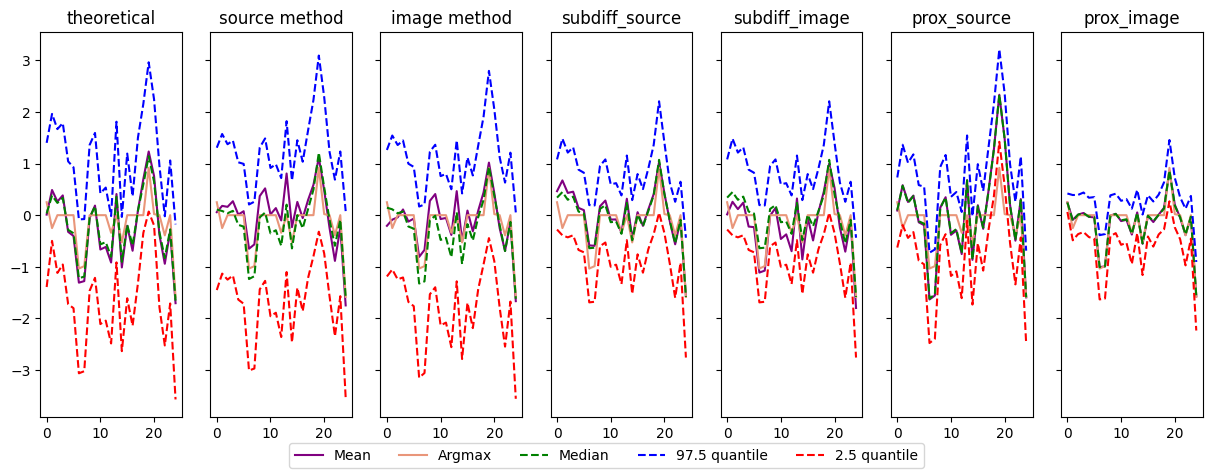

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 5), sharey=True)
_,x_tilde = ComputeArgmax(T, Lambda, Y, a, b)
q1 = ComputeQuantiles(T, Lambda, 0.975*np.ones(T), Y, a, b)
q2 = ComputeQuantiles(T, Lambda, 0.025*np.ones(T), Y, a, b)
med = ComputeQuantiles(T, Lambda, 0.5*np.ones(T), Y, a, b)
*_,mu_tilde = ComputeMeans(T, Lambda, Y, a, b,)

#Plot of empirical results with method source
axes[0].plot(mu_tilde,color="purple",label="Mean")
axes[0].plot(x_tilde,color="darksalmon",label="Argmax")
axes[0].plot(med,'g--',label="Median")
axes[0].plot(q1,'b--',label="97.5 quantile")
axes[0].plot(q2,'r--',label="2.5 quantile")
axes[0].set_title("theoretical")
fig.legend(loc="lower center", ncols=5)

#Plot of empirical results with method source
axes[1].plot(D@mean_source,color="purple")
axes[1].plot(x_tilde,color="darksalmon")
axes[1].plot(quantiles_emp1[1],'g--')
axes[1].plot(quantiles_emp1[2],'b--')
axes[1].plot(quantiles_emp1[0],'r--')
axes[1].set_title("source method")

#Plot of empirical results with method image
axes[2].plot(D@mean_image,color="purple")
axes[2].plot(x_tilde,color="darksalmon")
axes[2].plot(quantiles_emp2[1],'g--')
axes[2].plot(quantiles_emp2[2],'b--')
axes[2].plot(quantiles_emp2[0],'r--')
axes[2].set_title("image method")

#Plot of empirical results with method subdiff_source
axes[3].plot(D@mean_subdiff_source,color="purple")
axes[3].plot(x_tilde,color="darksalmon")
axes[3].plot(quantiles_emp3[1],'g--')
axes[3].plot(quantiles_emp3[2],'b--')
axes[3].plot(quantiles_emp3[0],'r--')
axes[3].set_title("subdiff_source")

#Plot of empirical results with method subdiff_image
axes[4].plot(D@mean_subdiff_image,color="purple")
axes[4].plot(x_tilde,color="darksalmon")
axes[4].plot(quantiles_emp4[1],'g--')
axes[4].plot(quantiles_emp4[2],'b--')
axes[4].plot(quantiles_emp4[0],'r--')
axes[4].set_title("subdiff_image")

#Plot of empirical results with method prox_source
axes[5].plot(D@mean_prox_source,color="purple")
axes[5].plot(x_tilde,color="darksalmon")
axes[5].plot(quantiles_emp5[1],'g--')
axes[5].plot(quantiles_emp5[2],'b--')
axes[5].plot(quantiles_emp5[0],'r--')
axes[5].set_title("prox_source")

#Plot of empirical results with method prox_image
axes[6].plot(D@mean_prox_image,color="purple")
axes[6].plot(x_tilde,color="darksalmon")
axes[6].plot(quantiles_emp6[1],'g--')
axes[6].plot(quantiles_emp6[2],'b--')
axes[6].plot(quantiles_emp6[0],'r--')
axes[6].set_title("prox_image")

quantile_quality_source = 0.5*np.sum(abs(quantiles_emp1[0] - q2))/(np.sum(abs(q2)))  + 0.5*np.sum(abs(quantiles_emp1[2] - q1))/np.sum(abs(q1))
quantile_quality_image = 0.5*np.sum(abs(quantiles_emp2[0] - q2))/np.sum(abs(q2))  + 0.5*np.sum(abs(quantiles_emp2[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_source = 0.5*np.sum(abs(quantiles_emp3[0] - q2))/np.sum(abs(q2))  + 0.5*np.sum(abs(quantiles_emp3[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_image = 0.5*np.sum(abs(quantiles_emp4[0] - q2))/np.sum(abs(q2)) + 0.5*np.sum(abs(quantiles_emp4[2] - q1))/np.sum(abs(q1))
quantile_quality_prox_source = 0.5*np.sum(abs(quantiles_emp5[0] - q2))/np.sum(abs(q2))  + 0.5*np.sum(abs(quantiles_emp5[2] - q1))/np.sum(abs(q1))
quantile_quality_prox_image = 0.5*np.sum(abs(quantiles_emp6[0] - q2))/np.sum(abs(q2)) + 0.5*np.sum(abs(quantiles_emp6[2] - q1))/np.sum(abs(q1))

print("Mean quality of .025 and .975 quantile estimation: ")

print(f"Source         : {quantile_quality_source:.2%}")
print(f"Image          : {quantile_quality_image:.2%}")
print(f"Source Subdiff : {quantile_quality_subdiff_source:.2%}")
print(f"Image Subdiff  : {quantile_quality_subdiff_image:.2%}")
print(f"Prox Source    : {quantile_quality_prox_source:.2%}")
print(f"Prox Image     : {quantile_quality_prox_image:.2%}")

In [131]:
sim_source_oat, accepts_source_oat, gammas_source_oat, burn_in_source_oat = PGdual_One_at_a_time(T, Lambda, Y, a, b, random_state=random_state)
sim_image_oat,  accepts_image_oat,  gammas_image_oat,  burn_in_image_oat  = PGdual_One_at_a_time(T, Lambda, Y, a, b, method="image", random_state=random_state)

In [132]:
psi = np.max(np.hstack([burn_in_image_oat, burn_in_source_oat]))
psi = int(psi)
print(f"end of last burn-in: {psi:d}")

end of last burn-in: 12999


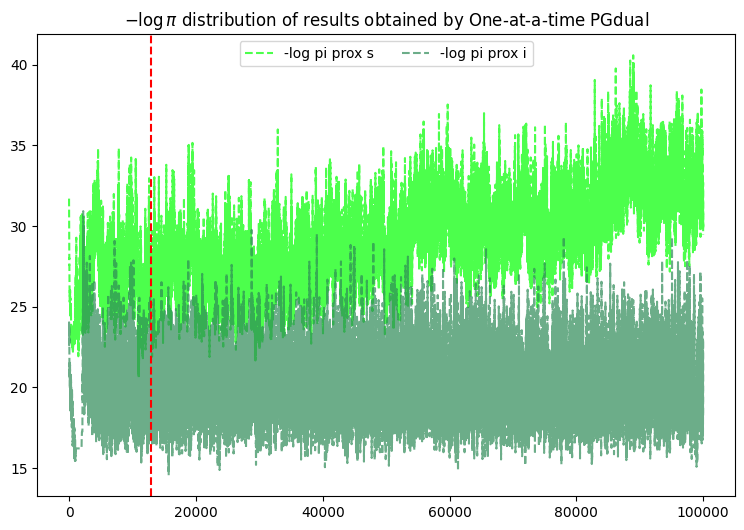

In [133]:
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T,a,b)

fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.set_title(r"$-\log{\pi}$ distribution of results obtained by One-at-a-time PGdual")
# ax.plot(-LogDistributionPi_Tab(sim_source_oat[psi-2000:], Y, A, D, sh, Lambda), color = "lime", label = "-log pi prox s", linestyle="dashed", alpha=0.7)
# ax.plot(-LogDistributionPi_Tab(sim_image_oat[psi-2000:], Y, A, D, sh, Lambda), color = "seagreen", label = "-log pi prox i", linestyle="dashed", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_source_oat, Y, A, D, sh, Lambda), color = "lime", label = "-log pi prox s", linestyle="dashed", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_image_oat, Y, A, D, sh, Lambda), color = "seagreen", label = "-log pi prox i", linestyle="dashed", alpha=0.7)
ax.axvline(psi, color="red", linestyle="dashed")
# ax.set_xticks(ax.get_xticks()[1:], labels = (ax.get_xticks()[1:]+3000).astype(int))
ax.legend(loc="upper center", ncols=2)

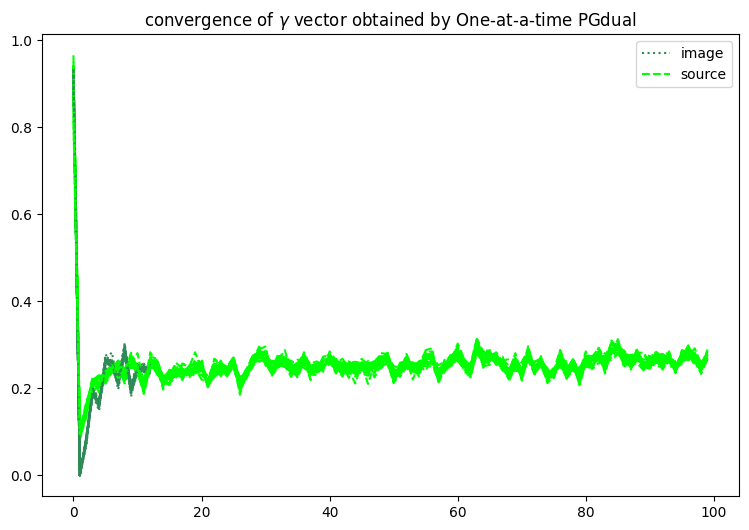

In [134]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.set_title(r"convergence of $\gamma$ vector obtained by One-at-a-time PGdual")
for i in range(T):
    ax.plot(accepts_image_oat[:,i], color="seagreen", linestyle="dotted", label="image" if i==0 else "")
    ax.plot(accepts_source_oat[:,i], color="lime", linestyle="dashed", label="source" if i==0 else "")
ax.legend()

In [135]:
print(f"burn in for image method:\n  {burn_in_image_oat}")
print(f"burn in for source method:\n{burn_in_source_oat}")

burn in for image method:
  [ 6006. 11001. 12000. 11001. 11001. 12999. 11001.  6006. 11001. 11001.
  6006. 11001. 11001. 11001.  7005. 11001. 12000. 11001.  6006.  7005.
 12000. 11001.  6006. 11001. 11001.]
burn in for source method:
[6019. 6019. 7019. 7019. 6019. 7019. 7019. 7019. 5019. 8019. 9019. 6019.
 7019. 7019. 7019. 6019. 7019. 8019. 8019. 6019. 6019. 7019. 6019. 6019.
 6019.]


Mean quality of .025 and .975 quantile estimation: 
Source One-at-a-time         : 42.64%
Image One-at-a-time          : 41.93%


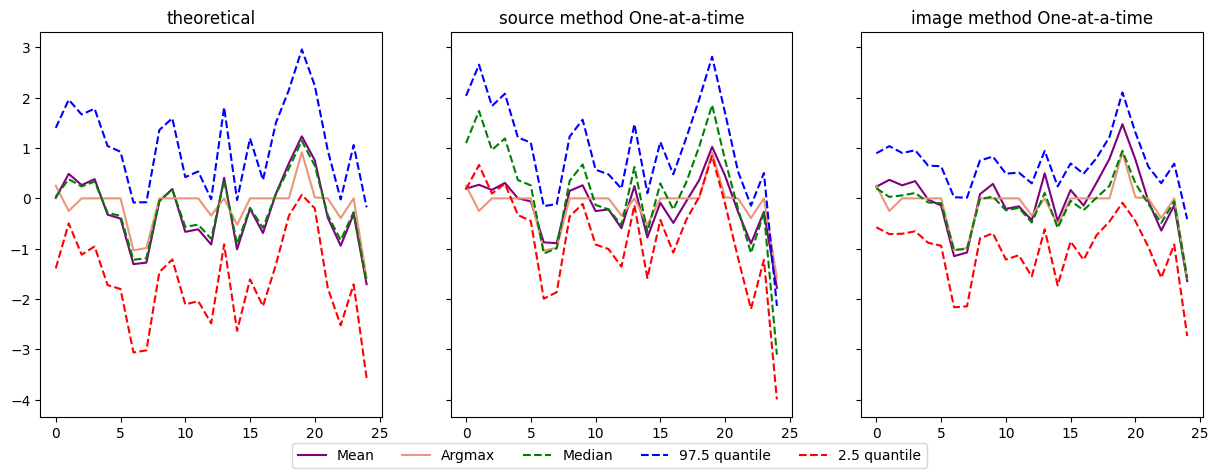

In [136]:
q = np.array([2.5,50,97.5])
quantiles_emp7 = Quantiles((D@sim_source_oat.T).T, q, T)
quantiles_emp8 = Quantiles((D@sim_image_oat.T).T, q, T)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
_,x_tilde = ComputeArgmax(T, Lambda, Y, a, b)
q1 = ComputeQuantiles(T, Lambda, 0.975*np.ones(T), Y, a, b)
q2 = ComputeQuantiles(T, Lambda, 0.025*np.ones(T), Y, a, b)
med = ComputeQuantiles(T, Lambda, 0.5*np.ones(T), Y, a, b)
*_,mu_tilde = ComputeMeans(T, Lambda, Y, a, b,)

#Plot of empirical results with method source
axes[0].plot(mu_tilde,color="purple",label="Mean")
axes[0].plot(x_tilde,color="darksalmon",label="Argmax")
axes[0].plot(med,'g--',label="Median")
axes[0].plot(q1,'b--',label="97.5 quantile")
axes[0].plot(q2,'r--',label="2.5 quantile")
axes[0].set_title("theoretical")
fig.legend(loc="lower center", ncols=5)

#Plot of empirical results with method source
axes[1].plot(D@mean_source,color="purple")
axes[1].plot(x_tilde,color="darksalmon")
axes[1].plot(quantiles_emp7[1],'g--')
axes[1].plot(quantiles_emp7[2],'b--')
axes[1].plot(quantiles_emp7[0],'r--')
axes[1].set_title("source method One-at-a-time")

#Plot of empirical results with method image
axes[2].plot(D@mean_image,color="purple")
axes[2].plot(x_tilde,color="darksalmon")
axes[2].plot(quantiles_emp8[1],'g--')
axes[2].plot(quantiles_emp8[2],'b--')
axes[2].plot(quantiles_emp8[0],'r--')
axes[2].set_title("image method One-at-a-time")


quantile_quality_source_oat = 0.5*np.sum(abs(quantiles_emp7[0] - q2))/(np.sum(abs(q2)))  + 0.5*np.sum(abs(quantiles_emp7[2] - q1))/np.sum(abs(q1))
quantile_quality_image_oat = 0.5*np.sum(abs(quantiles_emp8[0] - q2))/np.sum(abs(q2))  + 0.5*np.sum(abs(quantiles_emp8[2] - q1))/np.sum(abs(q1))


print("Mean quality of .025 and .975 quantile estimation: ")

print(f"Source One-at-a-time         : {quantile_quality_source_oat:.2%}")
print(f"Image One-at-a-time          : {quantile_quality_image_oat:.2%}")